<div>
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" width=100>
</div>

# Project 2: Ames Housing Data and Kaggle Challenge

## Background
The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.  
We are presented with this dataset to predict the prices of the houses in Ames, Iowa.  
The data is taken  from: https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data

## Problem Statement
As a consultant to a potential house-owner in the city of Ames of Iowa, I am presented with the challenge of finding the features that will affect the sale price of the house. In doing so, I will then be able to give recommendations to the potential house-owner on the features that will affect the value of the house the most.

## Part 1: EDA And Data Cleaning

### 1. Importing the libraries (All libraries used will be added here)

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the training dataset and the test dataset

In [2]:
df_train = pd.read_csv('../datasets/train.csv')

df_test = pd.read_csv('../datasets/test.csv')

### 3. Displaying the data

In [3]:
# Checking the shape of the training dataframe
df_train.shape

(2051, 81)

In [4]:
# Checking the shape of the test dataframe
df_test.shape

(878, 80)

In [5]:
# Checking the first 5 rows of the first 20 columns
df_train.iloc[:5, :20]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8


In [6]:
# Checking the first 5 rows of the next 20 columns
df_train.iloc[:5, 20:40]

,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0
1,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0
2,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0
3,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0
4,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0


In [7]:
# Checking the first 5 rows of the next 20 columns
df_train.iloc[:5, 40:60]

,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [8]:
# Checking the first 5 rows of the next 20 columns
df_train.iloc[:5, 60:80]

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD
1,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD
2,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
3,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD
4,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD


In [9]:
# Checking the first 5 rows of the last column
df_train.iloc[:5, [-1]]

,SalePrice
0,130500
1,220000
2,109000
3,174000
4,138500


**Here we will initialize the lists that would be required for the Data Cleaning Process.**

In [10]:
# Creating the drop_col list for the columns to drop in the data cleaning process
drop_cols = []

# Creating the quality list for the selected columns that require the conversion from object to numerical data
qual_cols = []

# Creating the list for the selected columns that do not require the above data cleaning
select_cols = []

# Creating the list for the columns that require replacing the null values to zero
to_zero_cols = []

# Creating the list for the columns that require replacing the null values to mean
to_mean_cols = []

# Creating the list for the columns that require replacing the null values to mode
to_mode_cols = []

#### 3.1 Checking for null values.

In [11]:
# Checking the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [12]:
# Showing the top 10 columns with null values
df_train.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Finish     114
Garage Qual       114
Garage Yr Blt     114
Garage Cond       114
dtype: int64

From above, we can see that the following list of columns have a lot of missing values:  
`Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu` 

Depending on our analysis, we may wish to drop these columns.

In [13]:
# Checking Pool QC
df_train['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [14]:
# Checking relationship Pool QC to Pool Area 
df_train['Pool Area'].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

From above, we can see that that the null values of `Pool QC` is related to the zero values of `Pool Area`. Considering the `Pool Area` column should suffice as a feature, we will drop this column.

In [15]:
drop_cols.append('Pool QC')

In [16]:
# Checking Misc Feature
df_train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

From above, we can see that there are only few `Misc Features` that cannot reliably be presented as numerical data for analysis, especially when considering that these features are basically additional features not covered by the other columns. Taking all these into account as well as null values meaning no additional features for that row, we will drop this column.

In [17]:
drop_cols.append('Misc Feature')

In [18]:
# Checking Alley
df_train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

From above, we can see that there are only 2 types of `Alleys` that cannot reliably be presented as numerical data for analysis. While this column can be changed to `1` and `0` by taking into account whether there is an alley or not, considering that there are 1911 null values out of 2051 rows, we will drop this column.

In [19]:
drop_cols.append('Alley')

In [20]:
# Checking Fence
df_train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

From above, we can see that these are `Fence` qualities that cannot reliably be presented as numerical data for analysis. Taking into account that information as well as the fact that the null values mean no Fences, and that there are 1651 null values out of 2051 rows, we will drop this column.

In [21]:
drop_cols.append('Fence')

In [22]:
# Checking Fireplace Qu
df_train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [23]:
# Checking relationship Fireplace QC to Fireplaces 
df_train['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

From above, we can see that that the null values of `Fireplace Qu` is related to the zero values of `Fireplaces`. Considering the `Fireplaces` column should suffice as a feature, we will drop this column.

In [24]:
drop_cols.append('Fireplace Qu')

As for the remaining null values, depending on the situation, we would have to fill in the missing values. Of note in the list of missing values above, the `Garage` features are likely to be linked to the zero values of Garage and can be replaced with a zero value. The `Lot Frontage` feature is a float value and with more than 10% being null values, care should be taken when filling in the missing values.

The missing values will likely be replaced with 'NA' for the object columns, and mean or mode for the numerical columns.

In [25]:
drop_cols

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']

**3.2 Checking the numeric columns.**

In [26]:
# Creating a list of numeric columns
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Statistics for the numeric columns
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


The numerical columns `Id`, `PID` and `MS SubClass` should be reclassed as Objects as they are not used as numericals here. Also, columns `Year Built`, `Year Remod/Add`, `Garage Yr Blt`, `Mo Sold` and `Yr Sold` can be reclassed as datetime instead.

There are also some obvious outliers like the max value of `Lot Area` being 159000, which is way too high and impossible, and the max value of `Garage Yr Blt` being 2207, which is impossible. These outliers will have to be addressed later when the feature selection occurs.

In [27]:
# Checking the unique values of PID
df_train['PID'].nunique()

2051

Seeing that the numerical column `PID` are all of unique values and the fact that this does not have any relevance to the actual features of the houses, we will be dropping this column since only the `Id` column is necessary for the identification of the house in the submission.

Also, since the `MS SubClass` column is a more detailed version of the `House Style` column, we will be dropping it here since it is like a duplicate column.

In [28]:
# Dropping the PID and MS SubClass column
drop_cols.extend(['PID','MS SubClass'])

# Adding the Id column to the Select Columns
select_cols.append('Id')

# Removing PID, MS SubClass from the num_cols 
for col in list(num_cols):
    if col in drop_cols:
        num_cols.remove(col)
    elif col in select_cols:
        num_cols.remove(col)

**3.2.1 Checking the correlation of the numeric columns.**

In [29]:
# Checking the correlation of the features in numeric columns against Sale Price
num_corr = df_train[num_cols].corr()['SalePrice'][:-1] # Last column is SalePrice, so ignoring it
num_corr.abs().sort_values(ascending=False) # Using absolute values since positive or negative does not matter yet

Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
3Ssn Porch         0.048732
Bsmt Half Bath     0.045328
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Yr Sold            0.015203
Misc Val           0.007375
Name: SalePrice, dty

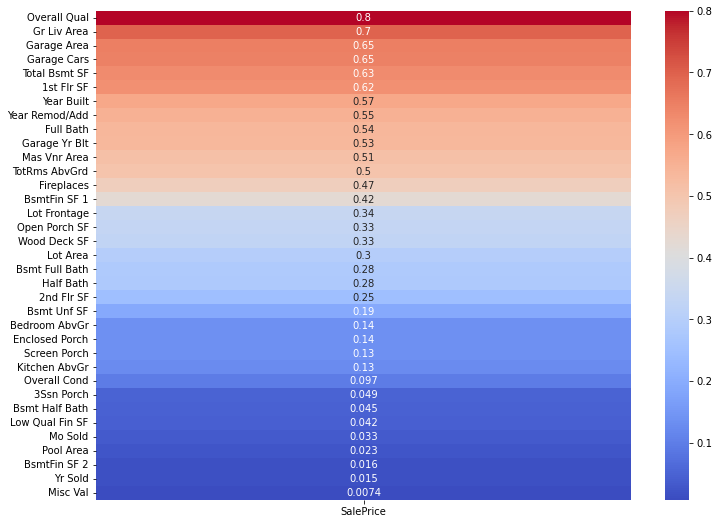

In [30]:
# Heatmap of correlation
plt.figure(figsize = [12, 9])
sns.heatmap(num_corr.abs().sort_values(ascending=False).to_frame(), annot=True, cmap = 'coolwarm');

From the correlation and the heatmap above, those columns with high correlation (over 50%) to the `SalePrice` would be considered as they will impact the `SalePrice` more significantly.

However, there will be other columns that have a lower correlation but might seem important that will be selected. This includes `Lot Area` which is the lot size of the property, `Lot Frontage` which is the size of street connected to property and `Fireplaces`.

In [31]:
# Dropping the lower correlations from the num_cols 
drop_cols.extend(list(num_corr.abs().sort_values(ascending=False).to_frame().index[13:]))
drop_cols.remove('Lot Area') # Adding Lot Area back to the non-dropped columns
drop_cols.remove('Lot Frontage') # Adding Lot Area back to the non-dropped columns

# Removing the lower correlations from the num_cols 
for col in list(num_cols):
    if col in drop_cols:
        num_cols.remove(col)

In [32]:
# Checking the number of null values in the remaining numberic columns
df_train[num_cols].isnull().sum()

Lot Frontage      330
Lot Area            0
Overall Qual        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       22
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Full Bath           0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
SalePrice           0
dtype: int64

In [33]:
# Function for Scatter Plot for feature vs sale price 
def scatter_feat_sales(feat):
    plt.figure(figsize = [12, 6])                                                        # Determine figure size
    plt.title(f'{feat} vs Sales Price', fontsize = 12)                                   # Title of Plot
    sns.regplot(x=feat, y = 'SalePrice', data = df_train, line_kws = {"color": "red"})  # Plot of Feature vs Sales Price

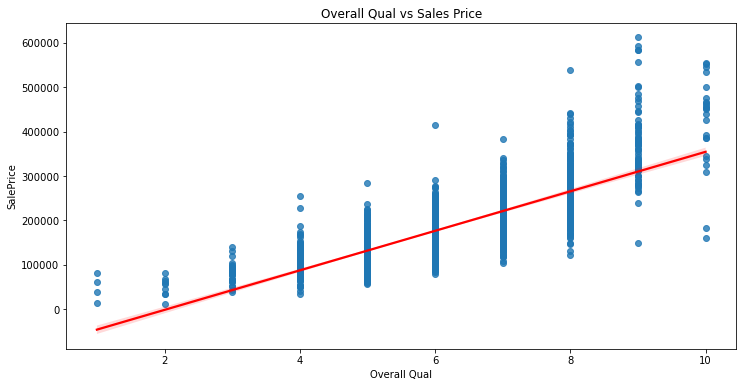

In [34]:
# Scatter Plot of Overall Qual against SalePrice
scatter_feat_sales('Overall Qual')

In [35]:
# Nothing out of place can really be seen, 
# but since Overall Qual has the highest correlation to SalePrice and is made up of discrete data,
# Adding the Overall Qual column to the Select Columns
select_cols.append('Overall Qual')

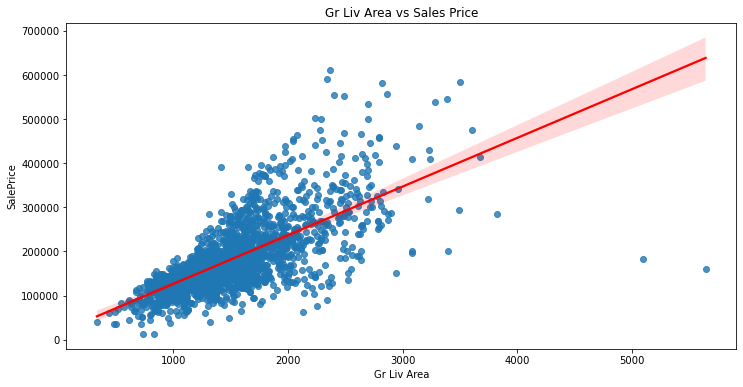

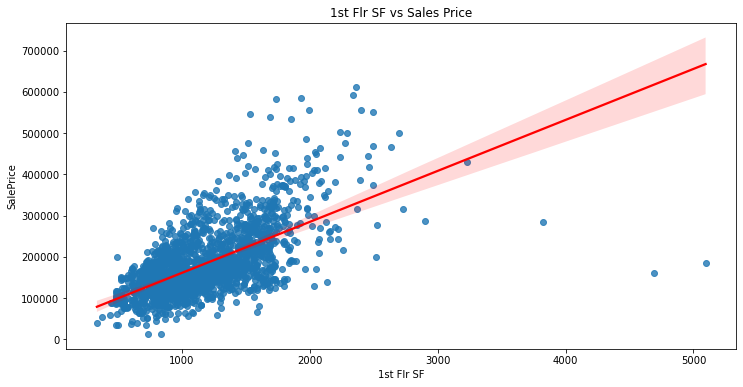

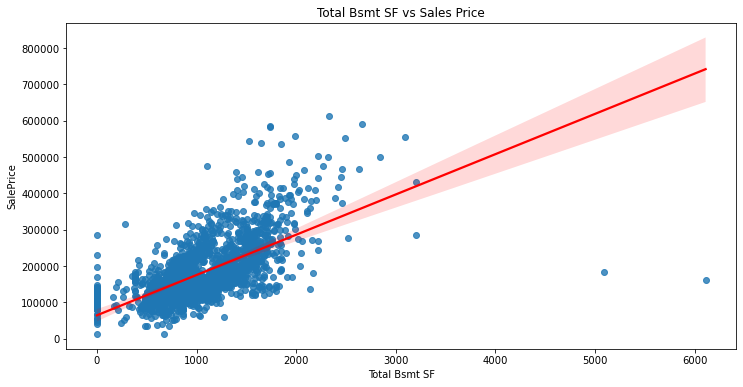

In [36]:
# Scatter Plots of Gr Liv Area, 1st Flr SF, Total Bsmt SF against SalePrice
scatter_feat_sales('Gr Liv Area')
scatter_feat_sales('1st Flr SF')
scatter_feat_sales('Total Bsmt SF')

Looking at the distributions, we can see that `Gr Liv Area`, `1st Flr SF` and `Total Bsmt SF` are somewhat similar. Since `Gr Liv Area` covers all living area above ground, `Total Bsmt SF` covers all the square feet of area under ground, and `1st Flr SF` only covers the square feet of living area of the 1st floor, we will keep the columns `Gr Liv Area` and `Total Bsmt SF`, and drop `1st Flr SF` to avoid multi-collinearity here.

Also, there are two obvious outliers in the distributions which we will have to remove later in the data cleaning.

In [37]:
# Displaying the outliers
display(df_train.loc[df_train['Gr Liv Area'] > 4000][['Gr Liv Area']]) 
display(df_train.loc[df_train['Total Bsmt SF'] > 4000][['Total Bsmt SF']])

,Gr Liv Area
960,5642
1885,5095


,Total Bsmt SF
960,6110.0
1885,5095.0


In [38]:
# Adding the Gr Liv Area, Total Bsmt SF columns to the Select Columns
select_cols.extend(['Gr Liv Area', 'Total Bsmt SF'])

# Adding the Total Bsmt SF columns to the to_zero Columns as it has a null value indicating no basement
to_zero_cols.append('Total Bsmt SF')

# Dropping the 1st Flr SF column
drop_cols.append('1st Flr SF')

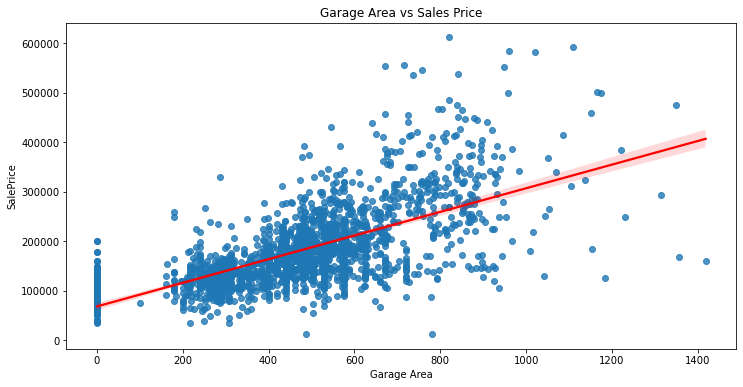

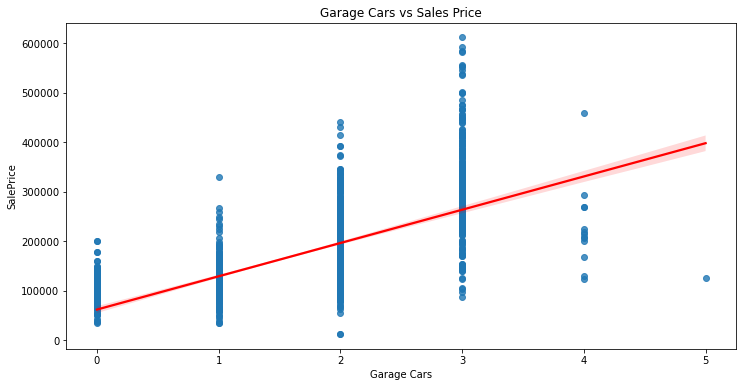

In [39]:
# Scatter Plots of Garage Area, Garage Cars against SalePrice
scatter_feat_sales('Garage Area')
scatter_feat_sales('Garage Cars')

From the descriptions of the features, we can see that `Garage Area` and `Garage Cars` are somewhat similar. Since `Garage Cars` is just a subset of `Garage Area`, we will keep the column `Garage Area`, and drop `Garage Cars` to avoid multi-collinearity here.

Do note that there is an outlier in the `Garage Cars` column, but we are ignoring this since it does not show up in the `Garage Area` column shown below.

In [40]:
# Displaying the outlier
df_train.loc[df_train['Garage Cars'] == 5][['Garage Area','Garage Cars']]

,Garage Area,Garage Cars
925,1184.0,5.0


In [41]:
# Adding the Garage Area column to the Select Columns
select_cols.append('Garage Area')

# Adding the Garage Area column to the to_mean columns as it has a null value to impute even though it has a garage
to_mean_cols.append('Garage Area')

# Dropping the Garage Cars column
drop_cols.append('Garage Cars')

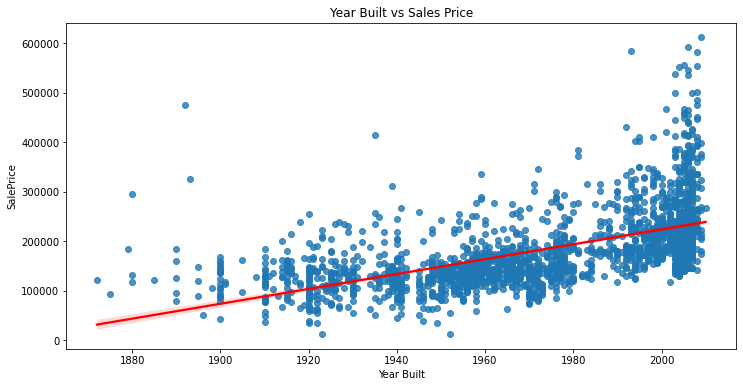

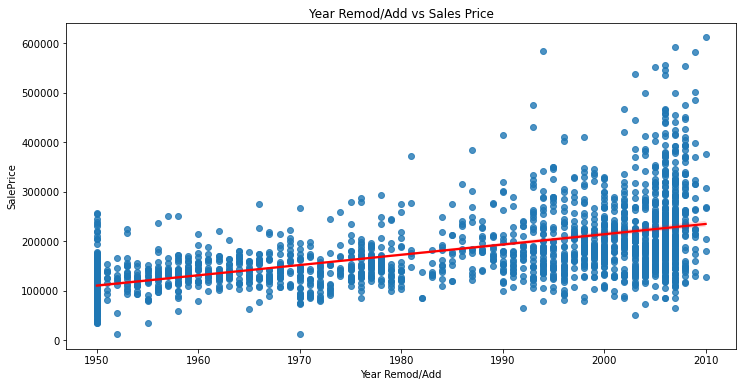

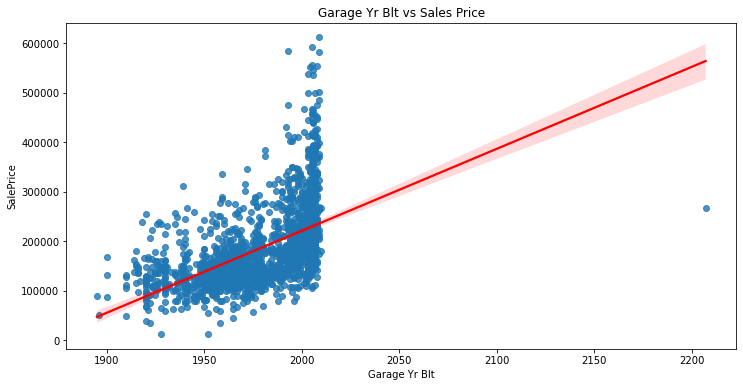

In [42]:
# Scatter Plots of Year Built, Year Remod/Add, Garage Yr Blt against SalePrice
scatter_feat_sales('Year Built')
scatter_feat_sales('Year Remod/Add')
scatter_feat_sales('Garage Yr Blt')

Looking at the three distributions, we can see that they are somewhat similar. As such, we will only keep the column `Year Built`, and drop the other two columns to avoid multi-collinearity here.

Do note that there is an outlier in the 'Garage Yr Blt' column, but we are ignoring this since it does not show up in the `Year Built` column shown below.

In [43]:
# Displaying the outlier
df_train.loc[df_train['Garage Yr Blt'] > 2200][['Year Built','Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
1699,2006,2007,2207.0


In [44]:
# Adding the Year Built column to the Select Columns
select_cols.append('Year Built')

# Dropping the Year Remod/Add, Garage Yr Blt columns
drop_cols.extend(['Year Remod/Add','Garage Yr Blt'])

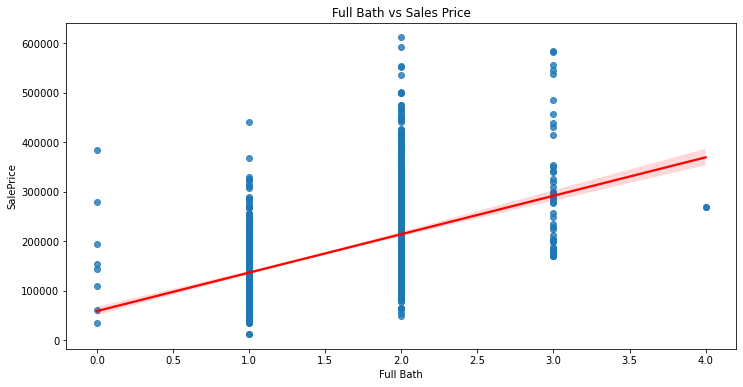

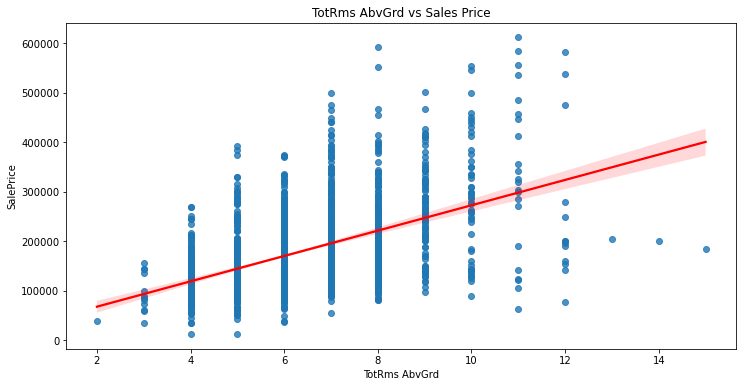

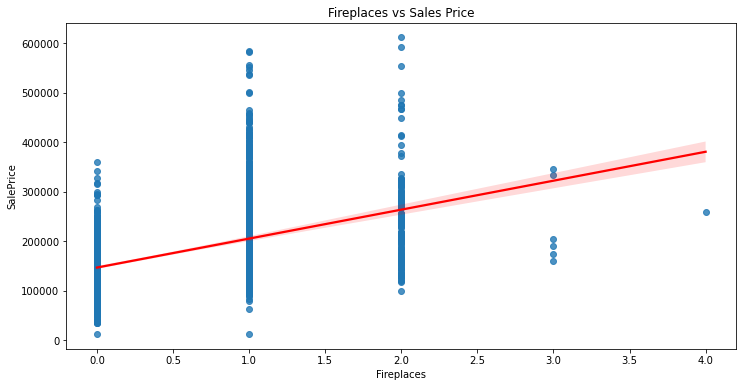

In [45]:
# Scatter Plots of Full Bath, TotRms AbvGrd, Fireplaces against SalePrice
scatter_feat_sales('Full Bath')
scatter_feat_sales('TotRms AbvGrd')
scatter_feat_sales('Fireplaces')

From the descriptions of the features, the three features do not overlap as they are refering to the full bathrooms, total rooms excluding bathrooms and fireplaces respectively. Considering the high correlations to SalePrice, we will keep them for now.

In [46]:
# Adding to the Select Columns
select_cols.extend(['Full Bath', 'TotRms AbvGrd', 'Fireplaces'])

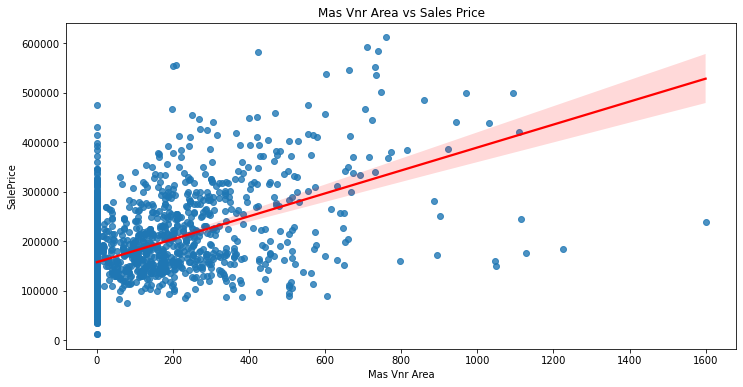

In [47]:
# Scatter Plots of Mas Vnr Area against SalePrice
scatter_feat_sales('Mas Vnr Area')

Looking at the distribution, we can see that there are a lot of values at 0, which affects the plot. Considering the relation between `Mas Vnr Area` and `Mas Vnr Type`, we will drop `Mas Vnr Area` column here.

In [48]:
# Dropping the column
drop_cols.append('Mas Vnr Area')

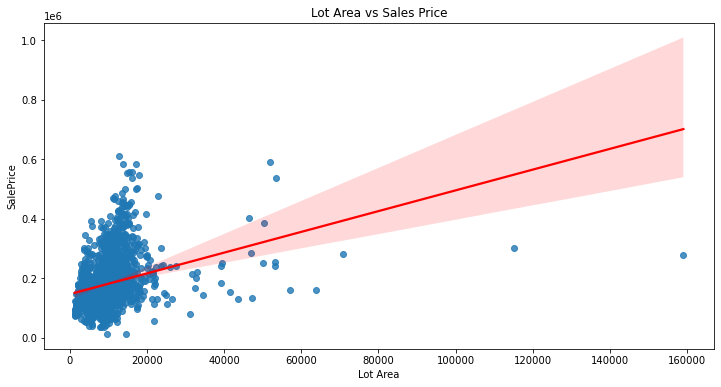

In [49]:
# Scatter Plots of Lot Area against SalePrice
scatter_feat_sales('Lot Area')

Considering how `Lot Area` will affect Saleprice, we will be keeping `Lot Area` column here.

Of note, there seem to be a lot of outliers here. Considering that 1 acre is 43560 square feet, and assuming that most houses would be less than 1 acre in lot size, we will be ignoring all of the values with `Lot Area` over 40000.

In [50]:
# Displaying the outliers
df_train.loc[df_train['Lot Area'] > 40000][['Lot Area']]

,Lot Area
441,41600
471,159000
616,47007
694,115149
745,57200
823,53504
960,63887
1052,53227
1167,47280
1542,46589


In [51]:
# Adding the Lot Area column to the Select Columns
select_cols.append('Lot Area')

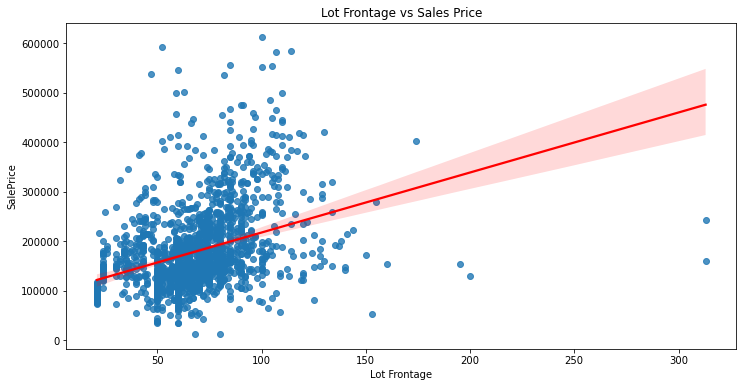

In [52]:
# Scatter Plots of Lot Frontage against SalePrice
scatter_feat_sales('Lot Frontage')

Considering how `Lot Frontage` will affect Saleprice, we will be keeping `Lot Frontage` column here.

Of note, there seem to be a lot of outliers here.  we will be ignoring all of the rows with `Lot Frontage` over 200.

In [53]:
# Displaying the outliers
df_train.loc[df_train['Lot Frontage'] > 200][['Lot Frontage']]

,Lot Frontage
960,313.0
1335,313.0


In [54]:
# Adding the Lot Frontage column to the Select Columns
select_cols.append('Lot Frontage')

# Adding Lot Frontage to the to_mean columns as there are null values to impute and having no street access is impossible
to_mean_cols.append('Lot Frontage')

**3.3 Checking the non-numeric columns.**

In [55]:
# Creating a list of non-numeric columns
non_num_cols = df_train.select_dtypes(include='object').columns.tolist()

# Removing the columns that are to be dropped
for col in list(non_num_cols):
    if col in drop_cols:
        non_num_cols.remove(col)

In [56]:
# Showing the first 20 non_num_cols
df_train[non_num_cols[:20]].head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc


In [57]:
# Showing the remaining non_num_cols
df_train[non_num_cols[20:]].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD


In [58]:
# Checking the values counts of the non-numerical columns
for col in non_num_cols:
    display(df_train[col].value_counts())

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

Pave    2044
Grvl       7
Name: Street, dtype: int64

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

Y    1910
N     141
Name: Central Air, dtype: int64

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

From the columns above, we can see that there are some columns are primarily dominated by a specific value. As such, it may be useful if we remove the columns with a percentage of values being of the mode, i.e, about 90%(?) being of a single value.

In [59]:
# Checking the frequency of the most frequent value in the non-numerical columns:
def get_mode_freq(col):
    return round(col.value_counts()[0] / col.count() * 100, 4)

df_train[non_num_cols].apply(get_mode_freq).sort_values(ascending=False)

Utilities         99.9025
Street            99.6587
Condition 2       98.7323
Roof Matl         98.7323
Heating           98.3910
Garage Cond       96.4378
Land Slope        95.2218
Garage Qual       94.5792
Functional        93.3691
Central Air       93.1253
Bsmt Cond         91.8838
Electrical        91.0775
Paved Drive       90.7362
Land Contour      89.8586
BsmtFin Type 2    87.6692
Sale Type         86.8357
Exter Cond        86.6894
Condition 1       86.1531
Bldg Type         82.8864
Roof Style        78.9371
MS Zoning         77.9132
Lot Config        73.2813
Bsmt Exposure     67.1851
Lot Shape         63.1399
Garage Type       62.5903
Exter Qual        60.7996
Mas Vnr Type      60.0296
Heating QC        51.9259
House Style       51.6333
Kitchen Qual      51.0483
Foundation        45.1487
Bsmt Qual         44.4389
Garage Finish     43.8307
Exterior 1st      35.2999
Exterior 2nd      35.1536
BsmtFin Type 1    30.8116
Neighborhood      15.1146
dtype: float64

From above, we can now clearly observe that there are many columns primarily dominated by the mode value. As such, taking this into account for feature selection, those columns with at least 85% frequency will likely be dropped. Thus the following columns will be ignored for feature selection:  
`Utilities, Street, Condition 2, Roof Matl, Heating, Garage Cond, Land Slope, Garage Qual, Functional, Central Air, Bsmt Cond, Electrical, Paved Drive, Land Contour, BsmtFin Type 2, Sale Type, Exter Cond, Condition 1`  

In [60]:
# Adding to the list of the Dropped Columns
drop_cols.extend(list(df_train[non_num_cols].apply(get_mode_freq).sort_values(ascending=False).head(18).index))

# Removing from the non-numerical columns
for col in list(non_num_cols):
    if col in drop_cols:
        non_num_cols.remove(col)

Looking at the non-numeric columns, there are also multiple columns that seem to be Quality columns that can be converted into numbers. Most of these are made up of qualities of `Ex, Gd, TA, Fa, Po & NA`, and thus can be substituted by the integers. We will be handling these appriopriately during the feature selection and the data cleaning later.

**3.2.1** Plots of the non-numeric columns   
At this point in time, let us exame the relationship between the `SalePrice` and the non-numeric columns.

In [61]:
# Checking the frequency of the most frequent value in the non-numerical columns (From the least):
df_train[non_num_cols].apply(get_mode_freq).sort_values()

Neighborhood      15.1146
BsmtFin Type 1    30.8116
Exterior 2nd      35.1536
Exterior 1st      35.2999
Garage Finish     43.8307
Bsmt Qual         44.4389
Foundation        45.1487
Kitchen Qual      51.0483
House Style       51.6333
Heating QC        51.9259
Mas Vnr Type      60.0296
Exter Qual        60.7996
Garage Type       62.5903
Lot Shape         63.1399
Bsmt Exposure     67.1851
Lot Config        73.2813
MS Zoning         77.9132
Roof Style        78.9371
Bldg Type         82.8864
dtype: float64

In [62]:
# Checking the number of null values in the non-numerical columns
df_train[non_num_cols].isnull().sum()

MS Zoning           0
Lot Shape           0
Lot Config          0
Neighborhood        0
Bldg Type           0
House Style         0
Roof Style          0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Exter Qual          0
Foundation          0
Bsmt Qual          55
Bsmt Exposure      58
BsmtFin Type 1     55
Heating QC          0
Kitchen Qual        0
Garage Type       113
Garage Finish     114
dtype: int64

In [63]:
# Function for Box Plot for feature vs sale price 
def box_feat_sales(feat):
    plt.figure(figsize = [16, 9])                                # Determine figure size
    plt.title(f'{feat} vs Sales Price', fontsize = 12)           # Title of Plot
    plt.xticks(rotation = 45)                                    # Rotating the x-ticks 
    sns.boxplot(x=feat, y = 'SalePrice', data = df_train);       # Plot of Feature vs Sales Price

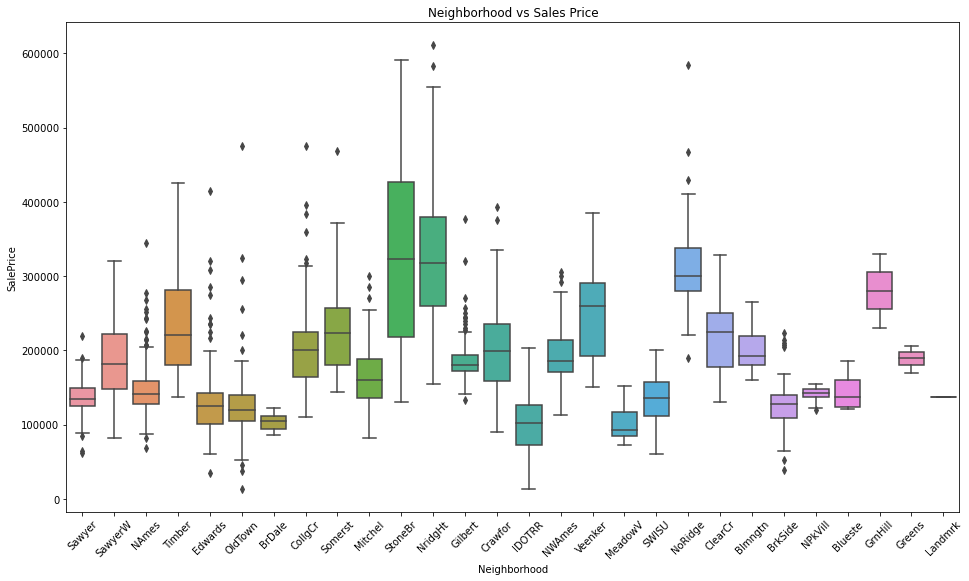

In [64]:
# Box Plot of Neighborhood against SalePrice
box_feat_sales('Neighborhood')

Looking at the distribution, we can see that for most neighborhoods, the medians seem to be at a similar range, though there are a few neighborhoods with a higher median `SalePrice`, ie, `StoneBr`, `NridgHt` and `NoRidge`. Of note, we may convert these columns into those in those neighhborhoods and those that aren't. Considering the idea that neighborhood will affect the Sales Price, as such, we will use those columns for feature selection for now.

In [65]:
# Adding the new converted dummified columns to the Select Columns
select_cols.extend(['neighborhood_stonebr', 'neighborhood_nridght', 'neighborhood_noridge'])

# Adding to the list of the Dropped Columns
drop_cols.append('Neighborhood')

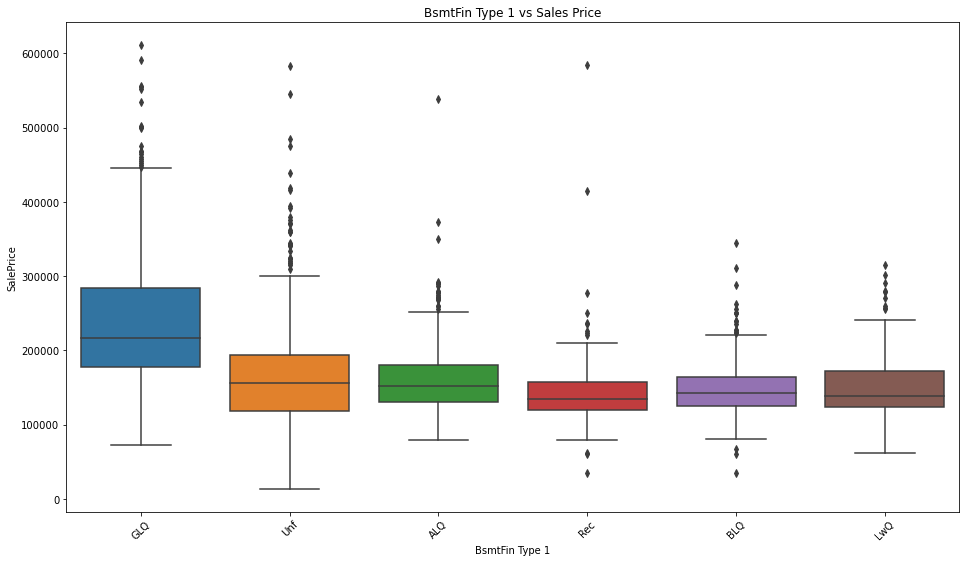

In [66]:
# Box Plot of BsmtFin Type 1 and BsmtFin Type 2 against SalePrice
box_feat_sales('BsmtFin Type 1')

Looking at the distributions, for these houses with `GLQ` quality for the basement has a higher `SalePrice`. Also, it should be noted that for the `Unf` quality, there are a lot of outliers. For now, we will convert this column into those with `GLQ` quality and those without, and use this for the feature selection.

In [67]:
# Adding the new converted dummified column to the Select Columns
select_cols.append('bsmt_fin_glq')

# Adding to the list of the Dropped Columns
drop_cols.append('BsmtFin Type 1')

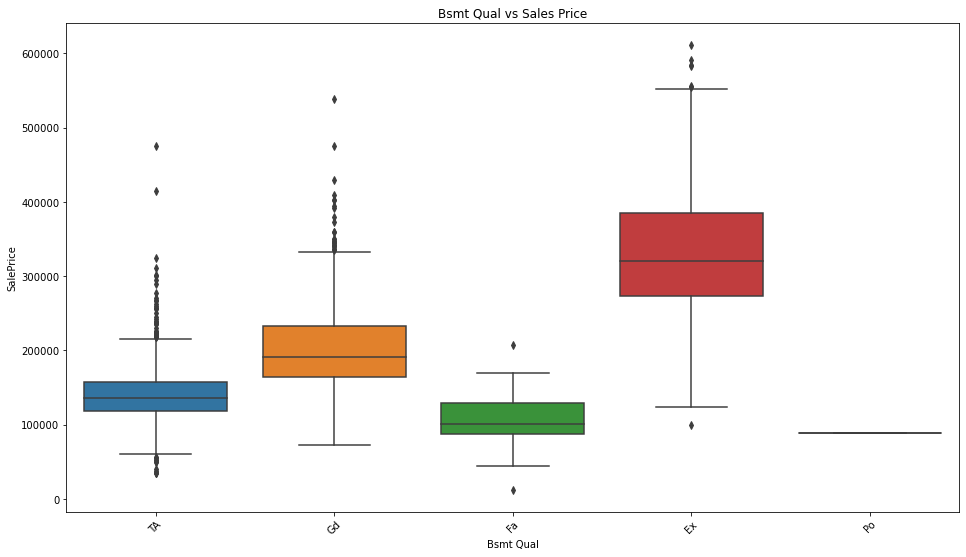

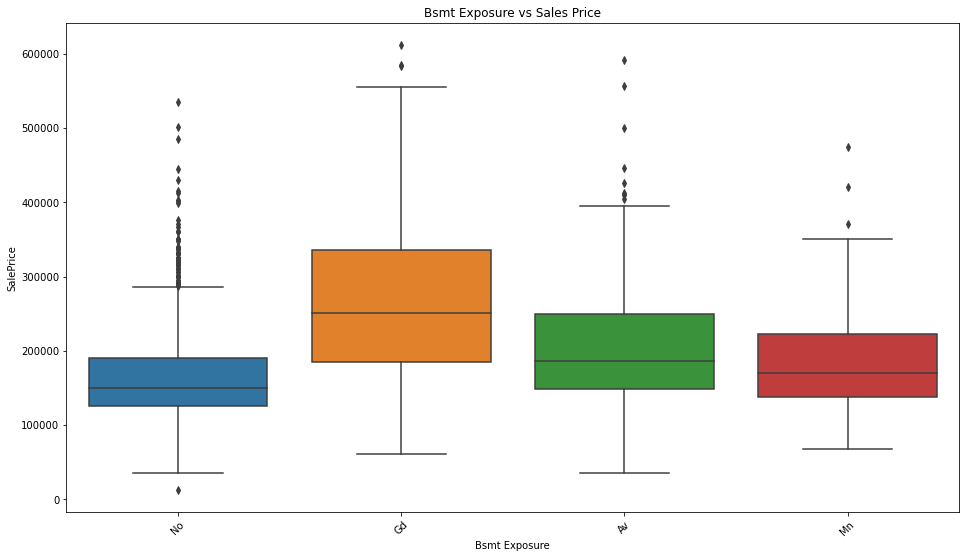

In [68]:
# Box Plot of Bsmt Qual and Bsmt Exposure against SalePrice
box_feat_sales('Bsmt Qual')
box_feat_sales('Bsmt Exposure')

Looking at the distributions, these two are ordinal columns that can be converted into numbers. Though, it should be noted that forms of quality are different for the two. Especially for `Bsmt Exposure` as the values it has differs. As such, we will be keeping these columns for feature selection.

In [69]:
# Adding the Bsmt Exposure column to the Select Columns, also note to do the additional cleaning later
select_cols.append('Bsmt Exposure')

# Adding the Bsmt Qual column to the list of the Qual Columns
qual_cols.append('Bsmt Qual')

# Adding the two columns to the to_zero columns as they have null values indicating 0 in discrete value to impute
to_zero_cols.extend(['Bsmt Exposure', 'Bsmt Qual'])

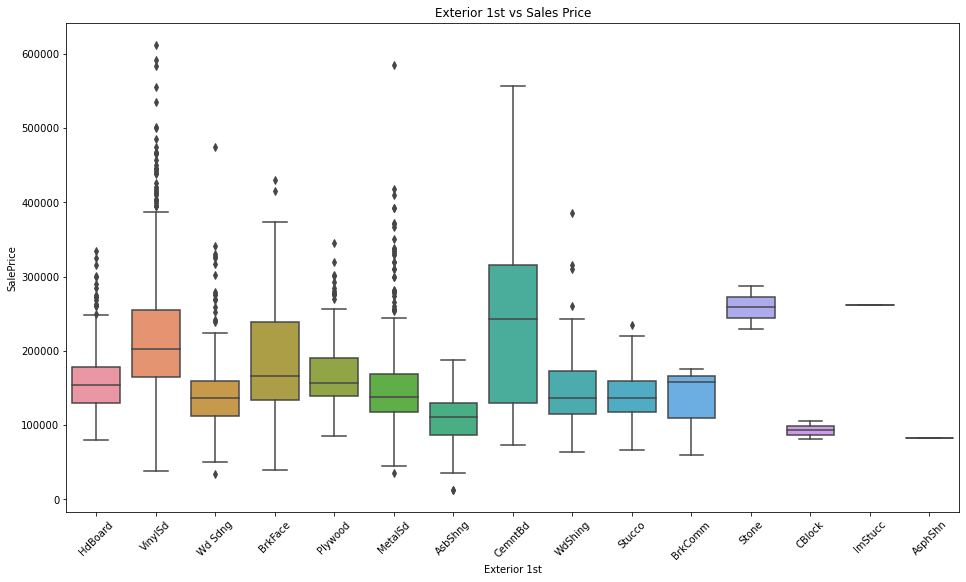

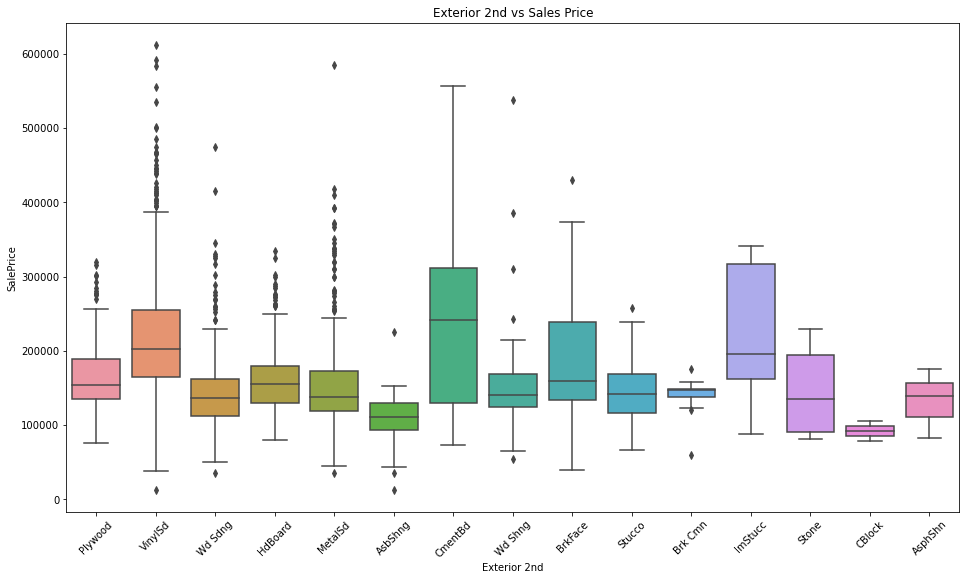

In [70]:
# Box Plots of Exterior 1st and Exterior 2nd against SalePrice
box_feat_sales('Exterior 1st')
box_feat_sales('Exterior 2nd')

Looking at the distributions, for these houses with `CmentBd` quality for the exterior has a higher `SalePrice`. However, it should be noted that there are a lot of outliers for the other qualities, we will drop these two columns for now, but will come back to them later if necessary.

In [71]:
# Adding to the list of the Dropped Columns
drop_cols.extend(['Exterior 1st', 'Exterior 2nd'])

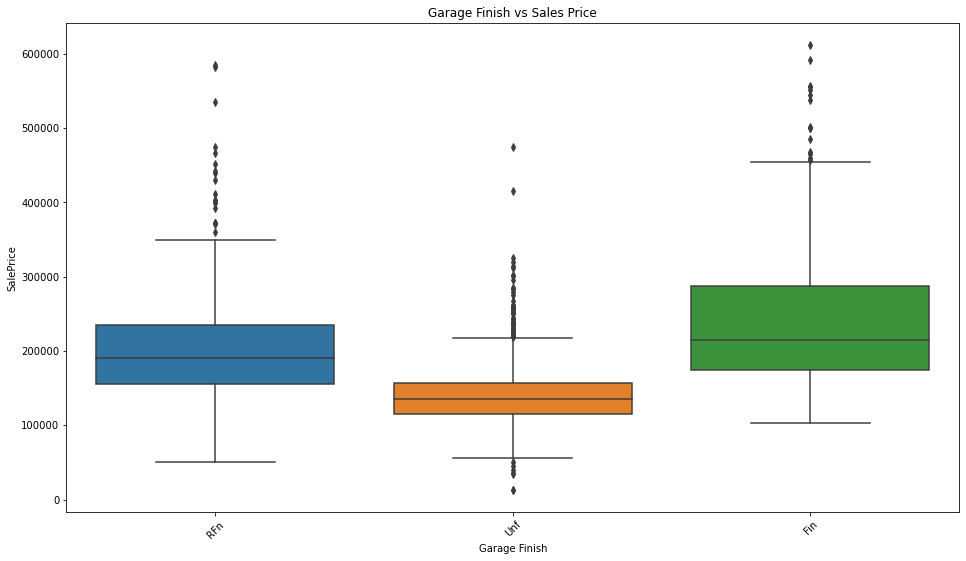

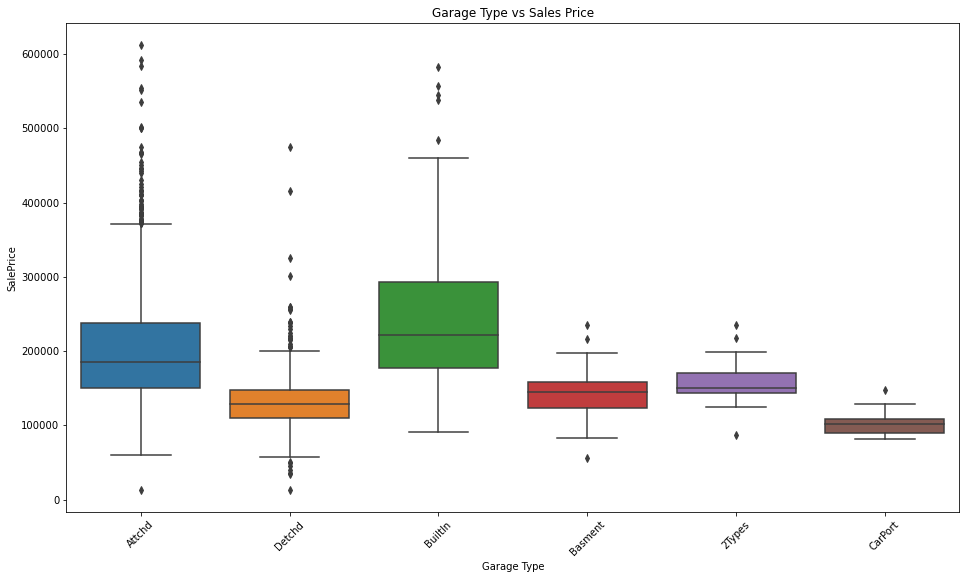

In [72]:
# Box Plot of BsmtFin Type 1 against SalePrice
box_feat_sales('Garage Finish')
box_feat_sales('Garage Type')

Looking at the distributions, we can see that the `Garage Type` affects the Sales Price, with the `BuiltIn` and `Attchd` types of garages having a higher Sale Price. Of note, we may convert this column into those with either of those two qualities and those without.

As for the `Garage Finish` column, we do not see any clear correlation to Sales Price, and as such we will drop this column.

In [73]:
# Adding the new converted dummified columns to the Select Columns
select_cols.extend(['garage_builtin','garage_attchd'])

# Adding to the list of the Dropped Columns
drop_cols.extend(['Garage Finish', 'Garage Type'])

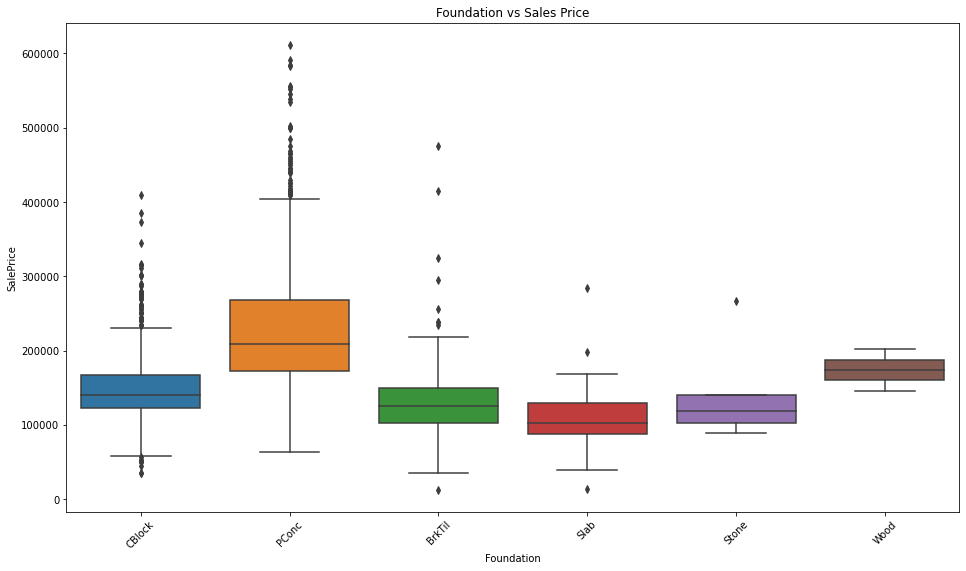

In [74]:
# Box Plot of Foundation against SalePrice
box_feat_sales('Foundation')

Looking at the distribution, we can clearly see that the `Foundation` of `PConc` tends towards higher Sales Price. As such, we may convert this column into those wth `PConc Foundation` and those without, and keep this column for feature selection.

In [75]:
# Adding the new converted dummified column to the Select Columns
select_cols.append('foundation_pconc')

# Adding to the list of the Dropped Columns
drop_cols.append('Foundation')

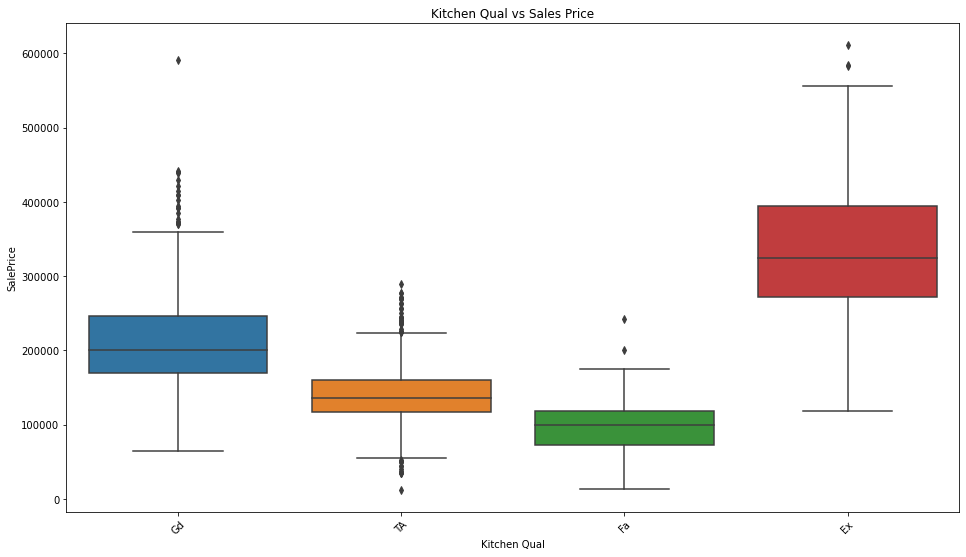

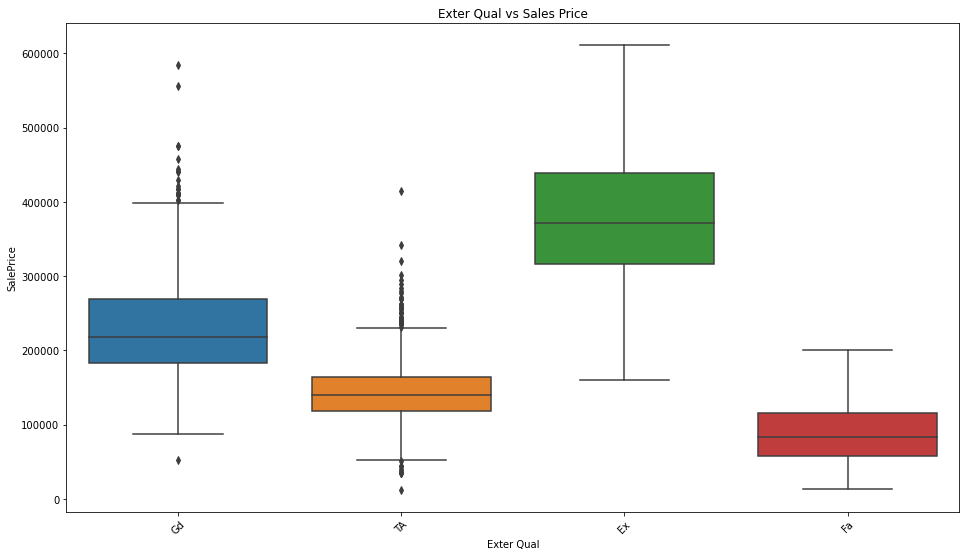

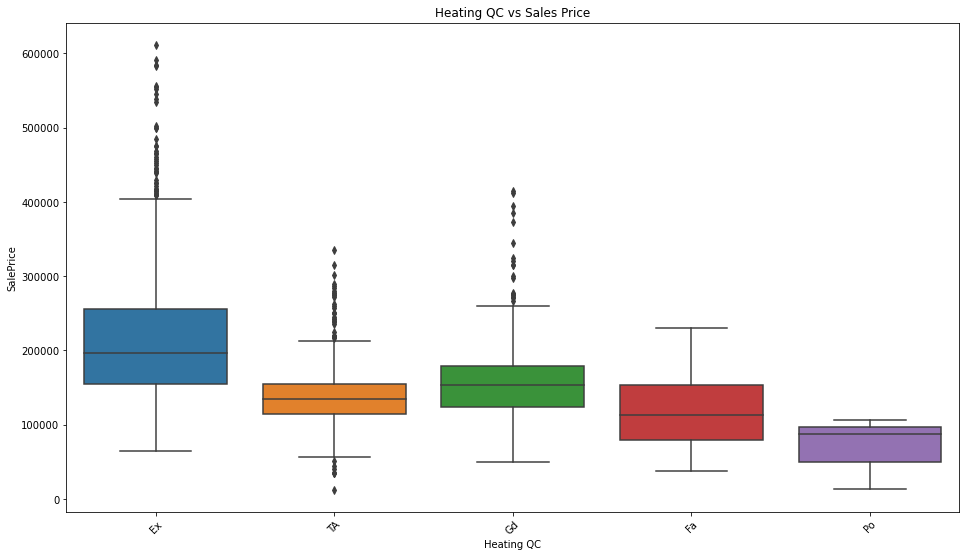

In [76]:
# Box Plots of the various Quality features against SalePrice
box_feat_sales('Kitchen Qual')
box_feat_sales('Exter Qual')
box_feat_sales('Heating QC')

Looking at the distributions, these three are ordinal columns that can be converted into numbers. As such, we will be keeping these columns for feature selection for now. 

In [77]:
# Adding the two columns to the list of the Qual Columns
qual_cols.extend(['Kitchen Qual', 'Exter Qual', 'Heating QC'])

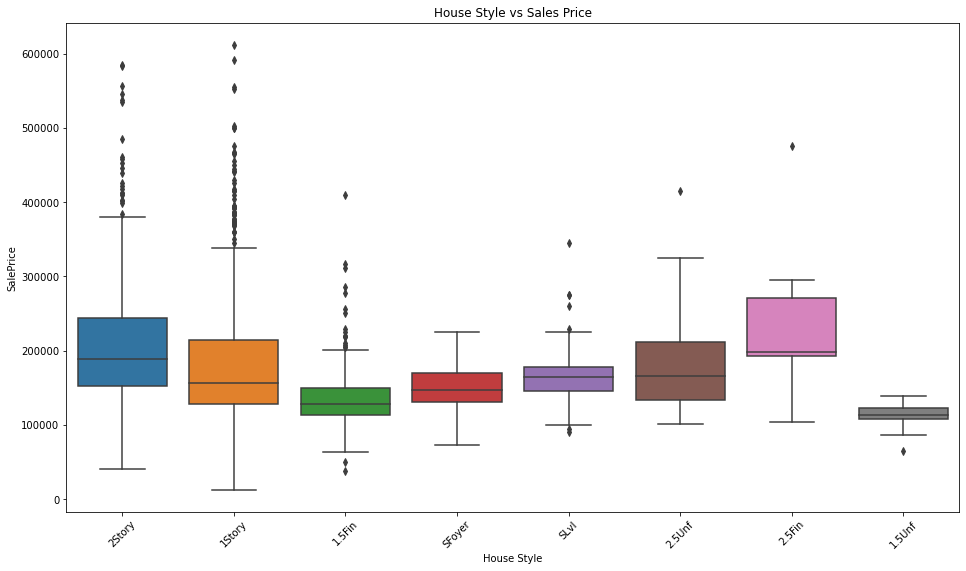

In [78]:
# Box Plots of House Style against SalePrice
box_feat_sales('House Style')

Looking at the distribution, we can see a lot of outliers and there do not seem to exist any obvious correlation to `SalePrice`. 

But considering the idea that the style of houses usually impact the Sale Price, and looking at how most houses seem to be either `1Story` or `2Story`, we wil convert this column into those with either of those two qualities and those without for our modelling purposes. 

In [79]:
# Adding the new converted dummified columns to the Select Columns
select_cols.extend(['house_1story','house_2story'])

# Adding to the list of the Dropped Columns
drop_cols.append('House Style')

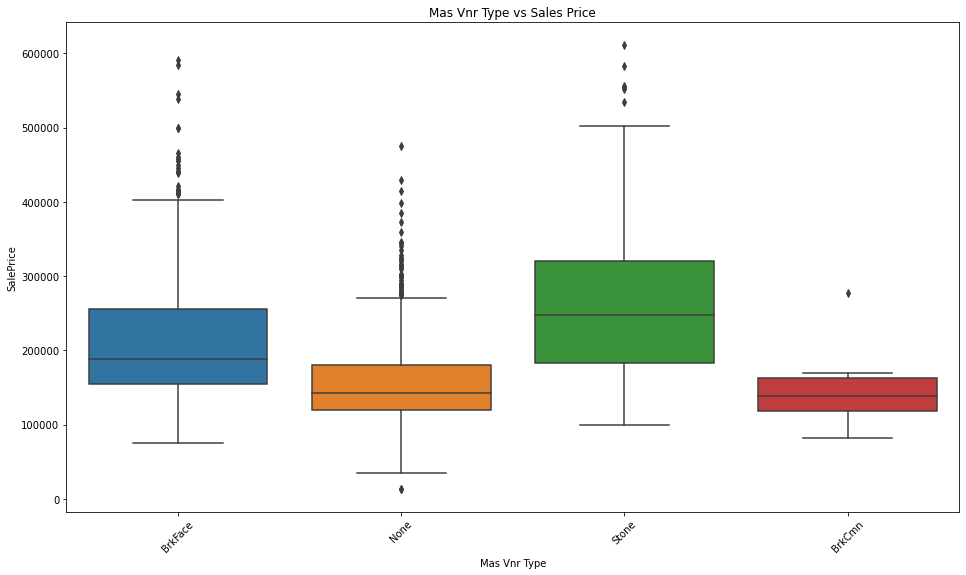

In [80]:
# Box Plots of Mas Vnr Type against SalePrice
box_feat_sales('Mas Vnr Type')

Looking at the distributions, we can see a lot of outliers in the box plot. While it seem that those of `Stone` or `BrkFace` tends towards higher `SalePrice`, it should be noted that about `60%` is those with `None`, ie, no masonry. Since we have already dropped the column `Mas Vnr Area` earlier, we will not be dropping this column here.

As such, we will be converting this column to those of `Stone` or `BrkFace` and those without.

In [81]:
# Adding the new converted dummified columns to the Select Columns
select_cols.extend(['masvnr_stone', 'masvnr_brkface'])

# Adding to the list of the Dropped Columns
drop_cols.append('Mas Vnr Type')

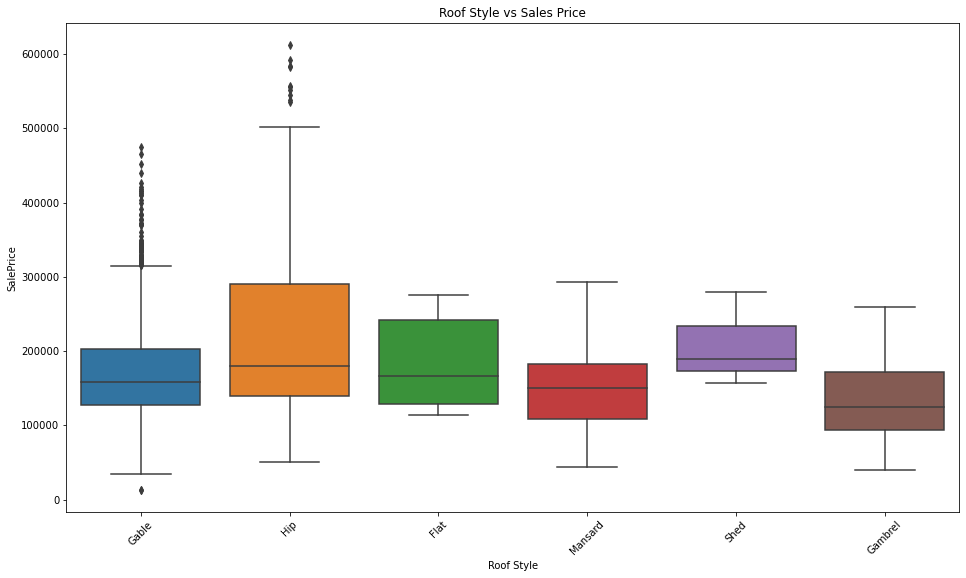

In [82]:
# Box Plots of Roof Style against SalePrice
box_feat_sales('Roof Style')

Looking at the distributions, we can see a lot of outliers in both box plots and it seem that the style of roofs do not seem to impact the Sale Price. As such, we will also be dropping this column.

In [83]:
# Adding to the list of the Dropped Columns
drop_cols.append('Roof Style')

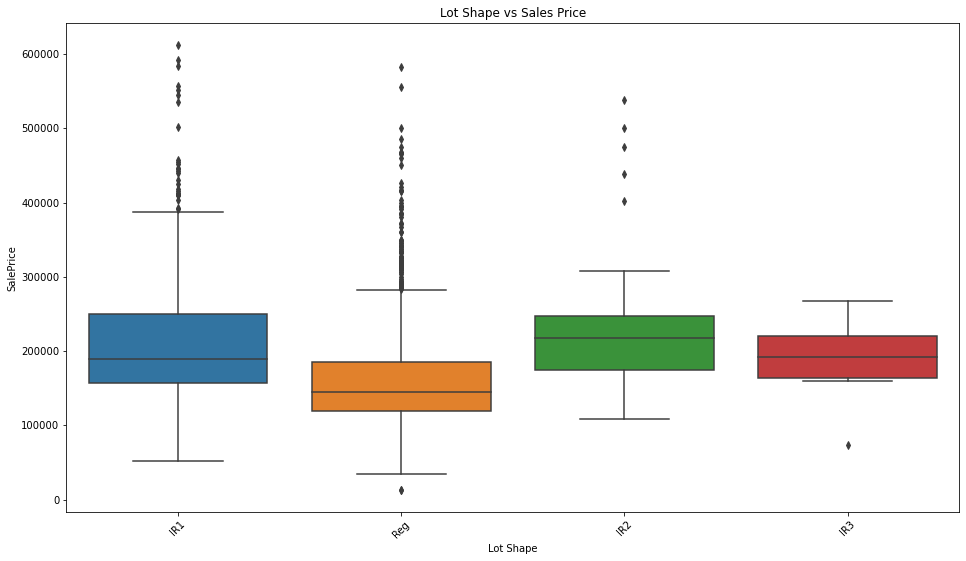

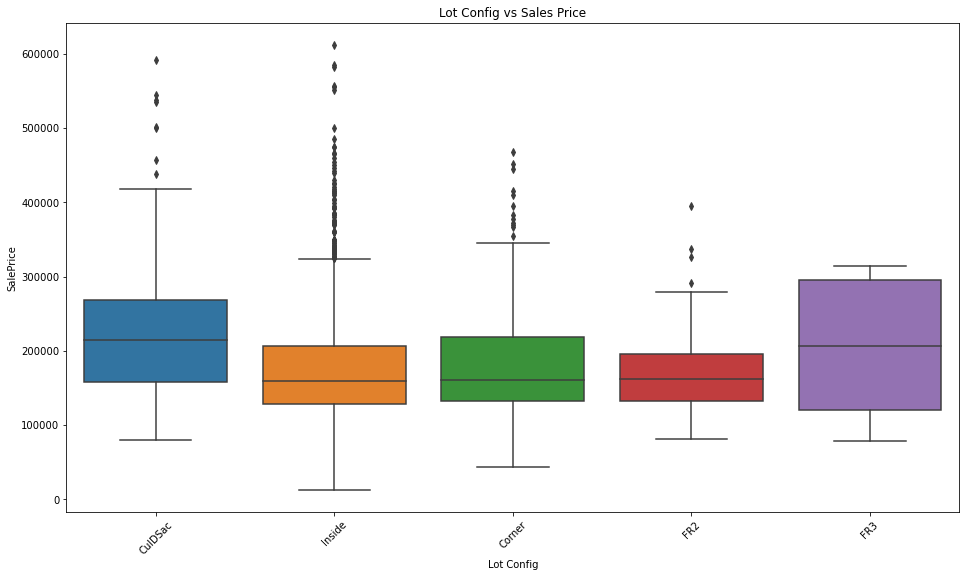

In [84]:
# Box Plots of House Style and Building Type against SalePrice
box_feat_sales('Lot Shape')
box_feat_sales('Lot Config')

Looking at the distributions, we can see a lot of outliers and there do not seem to exist any obvious correlation to `SalePrice`. As such, we will be dropping these two columns.

In [85]:
# Adding to the list of the Dropped Columns
drop_cols.extend(['Lot Shape', 'Lot Config'])

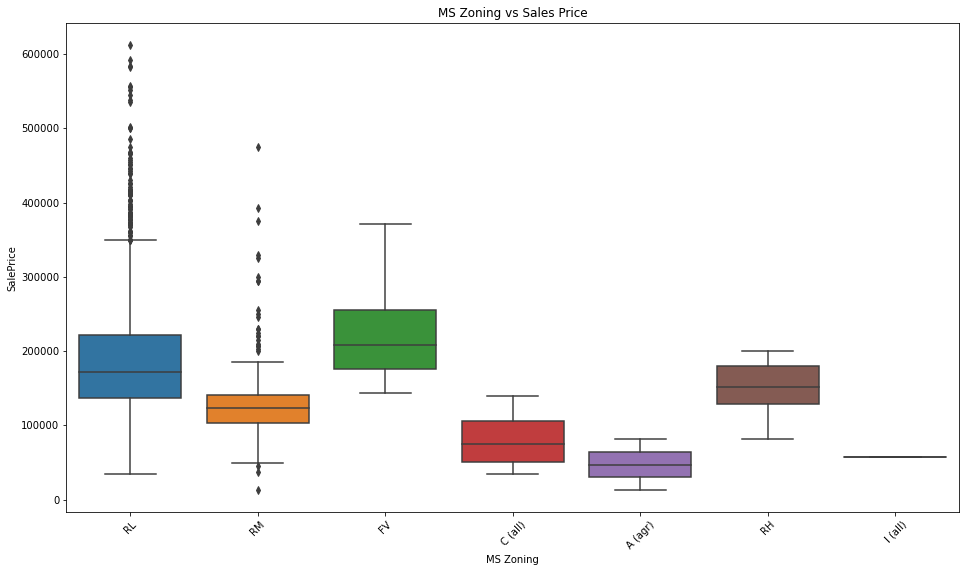

In [86]:
# Box Plots of MS Zoning against SalePrice
box_feat_sales('MS Zoning')

Looking at the distribution, we can see a lot of outliers and there seem to be a correlation with `Residential` zones with higher `SalePrice`. However, looking back at the value counts back earlier, since most houses are in `Residential` zones `(>90%)`, we will be dropping this column for now. This will be secondary consideration to improve the performance of the model if needed.

In [87]:
# Adding to the list of the Dropped Columns
drop_cols.append('MS Zoning')

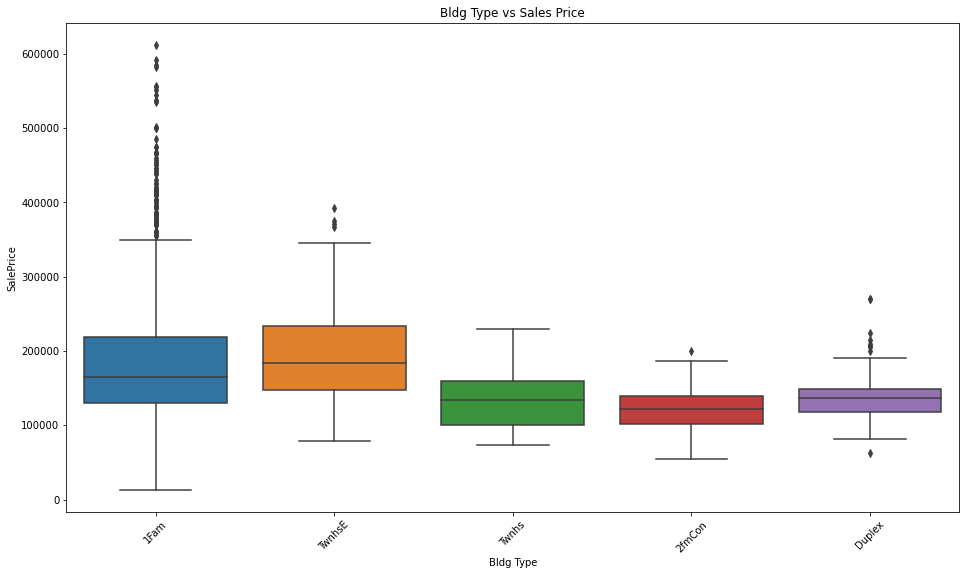

In [88]:
# Box Plots of Building Type against SalePrice
box_feat_sales('Bldg Type')

Looking at the distribution, we can see a lot of outliers in the first column of `1Fam`. Considering it is also the mode at `83%`, and it covers the entire range of the distribution, we will be dropping this for now. This will be secondary consideration to improve the performance of the model if needed.

In [89]:
# Adding to the list of the Dropped Columns
drop_cols.append('Bldg Type')

### 4. Cleaning the data for export

In [90]:
# Creating the dictionaries for the conversion of Quality to discrete numericals
qual_convert = { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0}
expo_convert = { 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 0: 0}

In [91]:
# Function to perform all the necessary data cleaning
def clean_df(dataframe, drop_cols=drop_cols, qual_cols=qual_cols, to_zero_cols=to_zero_cols, to_mean_cols=to_mean_cols):
    
    # Imputing the zero values to the to_zero columns
    for col in to_zero_cols:
        dataframe[col].fillna(0, inplace=True)
    
    # Imputing the mean values to the to_mean columns
    for col in to_mean_cols:
        dataframe[col].fillna(df_train[col].mean(), inplace=True)
    
    # Creating dummy columns for Neighborhood for the three selected neighborhoods
    dataframe['neighborhood_stonebr'] = dataframe['Neighborhood'].apply(lambda x: 1 if x == 'StoneBr' else 0)
    dataframe['neighborhood_nridght'] = dataframe['Neighborhood'].apply(lambda x: 1 if x == 'NridgHt' else 0) 
    dataframe['neighborhood_noridge'] = dataframe['Neighborhood'].apply(lambda x: 1 if x == 'NoRidge' else 0)
    
    # Creating a dummy column for Bsmt Fin Type 1 for GLQ quality
    dataframe['bsmt_fin_glq'] = dataframe['BsmtFin Type 1'].apply(lambda x: 1 if x == 'GLQ' else 0)
    
    # Creating dummy columns for Garage Type of BuiltIn and Attchd
    dataframe['garage_builtin'] = dataframe['Garage Type'].apply(lambda x: 1 if x == 'BuiltIn' else 0)
    dataframe['garage_attchd'] = dataframe['Garage Type'].apply(lambda x: 1 if x == 'Attchd' else 0)
    
    # Creating a dummy column for Foundation for PConc
    dataframe['foundation_pconc'] = dataframe['Foundation'].apply(lambda x: 1 if x == 'PConc' else 0)
    
    # Creating dummy columns for House Style of 1Story and 2Story 
    dataframe['house_1story'] = dataframe['House Style'].apply(lambda x: 1 if x == '1Story' else 0)
    dataframe['house_2story'] = dataframe['House Style'].apply(lambda x: 1 if x == '2Story' else 0)
    
    # Creating dummy columns for Mas Vnr Type for those of Stone or BrkFace
    dataframe['masvnr_stone'] = dataframe['Mas Vnr Type'].apply(lambda x: 1 if x == 'Stone' else 0)
    dataframe['masvnr_brkface'] = dataframe['Mas Vnr Type'].apply(lambda x: 1 if x == 'BrkFace' else 0)
    
    # Converting the rows with outliers to the specific max value (Gr Liv Area above 4000, Lot Area above 40000, Lot Frontage above 200)
    dataframe.loc[dataframe['Gr Liv Area'] > 4000, 'Gr Liv Area'] = 4000
    dataframe.loc[dataframe['Lot Area'] > 40000, 'Lot Area'] = 40000
    dataframe.loc[dataframe['Lot Frontage'] > 200, 'Lot Frontage'] = 200
    
    # Converting the ordinal columns to discrete
    for col in qual_cols:
        dataframe[col] = dataframe[col].map(qual_convert)
        
    dataframe['Bsmt Exposure'] = dataframe['Bsmt Exposure'].map(expo_convert)
    
    # Drop columns
    dataframe.drop(columns=drop_cols, inplace = True)
    
    return dataframe

In [92]:
# Rename column function
def rename_cols(dataframe):
    dataframe.columns = [x.lower().replace(' ','_') for x in dataframe.columns]

In [93]:
# Cleaning the dataframes
df_train_clean = clean_df(dataframe = df_train.copy())
df_test_clean = clean_df(dataframe = df_test.copy())

# Renaming the columns
rename_cols(df_train_clean)
rename_cols(df_test_clean)

In [94]:
# Displaying the shape of the new dataframes
display(df_train_clean.shape)
display(df_test_clean.shape)

(2051, 28)

(878, 27)

In [95]:
# Checking the datatypes of the dataframe for any errors
df_train_clean.dtypes

id                        int64
lot_frontage            float64
lot_area                  int64
overall_qual              int64
year_built                int64
exter_qual                int64
bsmt_qual                 int64
bsmt_exposure             int64
total_bsmt_sf           float64
heating_qc                int64
gr_liv_area               int64
full_bath                 int64
kitchen_qual              int64
totrms_abvgrd             int64
fireplaces                int64
garage_area             float64
saleprice                 int64
neighborhood_stonebr      int64
neighborhood_nridght      int64
neighborhood_noridge      int64
bsmt_fin_glq              int64
garage_builtin            int64
garage_attchd             int64
foundation_pconc          int64
house_1story              int64
house_2story              int64
masvnr_stone              int64
masvnr_brkface            int64
dtype: object

In [96]:
# Checking for null values again
df_train_clean.isnull().sum()

id                      0
lot_frontage            0
lot_area                0
overall_qual            0
year_built              0
exter_qual              0
bsmt_qual               0
bsmt_exposure           0
total_bsmt_sf           0
heating_qc              0
gr_liv_area             0
full_bath               0
kitchen_qual            0
totrms_abvgrd           0
fireplaces              0
garage_area             0
saleprice               0
neighborhood_stonebr    0
neighborhood_nridght    0
neighborhood_noridge    0
bsmt_fin_glq            0
garage_builtin          0
garage_attchd           0
foundation_pconc        0
house_1story            0
house_2story            0
masvnr_stone            0
masvnr_brkface          0
dtype: int64

In [99]:
# Listing the columns that is required to be scaled, the dummy columns do not need to be scaled
list(df_train_clean.columns)[1:16]

['lot_frontage',
 'lot_area',
 'overall_qual',
 'year_built',
 'exter_qual',
 'bsmt_qual',
 'bsmt_exposure',
 'total_bsmt_sf',
 'heating_qc',
 'gr_liv_area',
 'full_bath',
 'kitchen_qual',
 'totrms_abvgrd',
 'fireplaces',
 'garage_area']

In [98]:
# Exporting the cleaned datasets to file
df_train_clean.to_csv('../datasets/train_clean.csv', index=False)
df_test_clean.to_csv('../datasets/test_clean.csv', index=False)